In [1]:
import numpy as np
import pandas as pd

from algorithm.util.directed_graph import DirectedGraph
from algorithm.util.read_pairs_data import read_pairs_db
from algorithm.util.graph_vis import GraphVisualization
from algorithm.edmonds import EdmondsAlgorithm
from algorithm.first_accept_n_way import FirstAcceptNWay
from algorithm.priority_based_n_way import PriorityBasedNWay

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ranges = [(100 * i, 100 * i + 99) for i in range(30)]

In [3]:
edmond_matches = []
first_accept_matches3 = []
first_accept_matches10 = []
priority_based3 = []
priority_based10 = []

for each_range in ranges:
    pairs_data = read_pairs_db(each_range[0], each_range[1])
    grph = DirectedGraph(pairs_data)
    
    # Benchmark = Edmond's Algorithm
    edmond = EdmondsAlgorithm(priority_threshold=100)
    edmond.finalize_exchange(grph)
    edmond_matches.append(edmond.get_num_of_matched_pairs())
    
    # First Accept N Way with n = 3
    fanway3 = FirstAcceptNWay(3, 'maximum')
    fanway3.finalize_exchange(grph)
    first_accept_matches3.append(fanway3.get_num_of_matched_pairs())
    
    # First Accept N Way with n = 10
    fanway10 = FirstAcceptNWay(10, 'maximum')
    fanway10.finalize_exchange(grph)
    first_accept_matches10.append(fanway10.get_num_of_matched_pairs())
    
    # Priority Based N Way with n = 3
    pbnway3 = PriorityBasedNWay(3, 'maximum')
    pbnway3.finalize_exchange(grph)
    priority_based3.append(pbnway3.get_num_of_matched_pairs())
    
    # Priority Based N Way with n = 10
    pbnway10 = PriorityBasedNWay(10, 'maximum')
    pbnway10.finalize_exchange(grph)
    priority_based10.append(pbnway10.get_num_of_matched_pairs())

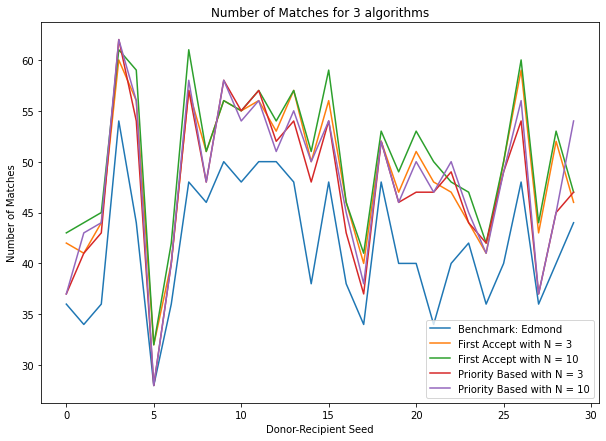

In [4]:
plt.figure(figsize=(10, 7))

plt.title("Number of Matches for 3 algorithms")
plt.xlabel("Donor-Recipient Seed")
plt.ylabel("Number of Matches")

plt.plot(edmond_matches, label='Benchmark: Edmond')
plt.plot(first_accept_matches3, label='First Accept with N = 3')
plt.plot(first_accept_matches10, label='First Accept with N = 10')
plt.plot(priority_based3, label='Priority Based with N = 3')
plt.plot(priority_based10, label='Priority Based with N = 10')

plt.legend()

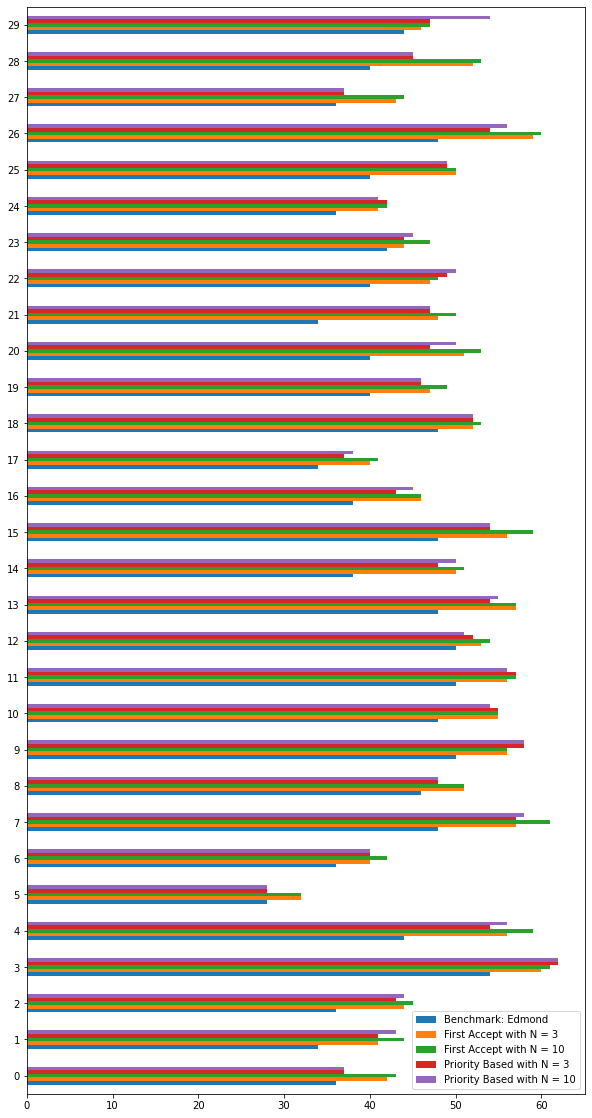

In [5]:
to_plot = pd.DataFrame({
    "Benchmark: Edmond": edmond_matches,
    "First Accept with N = 3": first_accept_matches3,
    "First Accept with N = 10": first_accept_matches10,
    "Priority Based with N = 3": priority_based3,
    "Priority Based with N = 10": priority_based10
})

ax = to_plot.plot.barh(figsize=(10, 20))

In [6]:
# Firsh Accept

different_n_1000_1099 = []
different_n_1500_1599 = []
different_n_2100_2199 = []
different_n_2900_2999 = []

pairs_data1 = read_pairs_db(1000, 1099)
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_pairs_db(1500, 1599)
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_pairs_db(2100, 2199)
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_pairs_db(2900, 2999)
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    fanway1 = FirstAcceptNWay(n, 'maximum')
    fanway1.finalize_exchange(grph1)
    different_n_1000_1099.append(fanway1.get_num_of_matched_pairs())
    
    fanway2 = FirstAcceptNWay(n, 'maximum')
    fanway2.finalize_exchange(grph2)
    different_n_1500_1599.append(fanway2.get_num_of_matched_pairs())
    
    fanway3 = FirstAcceptNWay(n, 'maximum')
    fanway3.finalize_exchange(grph3)
    different_n_2100_2199.append(fanway3.get_num_of_matched_pairs())  
    
    fanway4 = FirstAcceptNWay(n, 'maximum')
    fanway4.finalize_exchange(grph4)
    different_n_2900_2999.append(fanway4.get_num_of_matched_pairs())

In [7]:
print(different_n_1000_1099)
print(different_n_1500_1599)
print(different_n_2100_2199)
print(different_n_2900_2999)

[48, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
[48, 56, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59]
[36, 48, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
[44, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47]


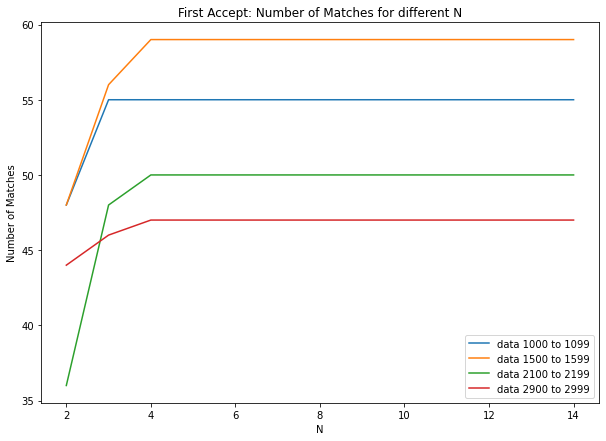

In [8]:
plt.figure(figsize=(10, 7))

plt.title("First Accept: Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=different_n_1000_1099, x=range(2,15))
sns.lineplot(y=different_n_1500_1599, x=range(2,15))
sns.lineplot(y=different_n_2100_2199, x=range(2,15))
sns.lineplot(y=different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])

In [9]:
# Priority Based

pb_different_n_1000_1099 = []
pb_different_n_1500_1599 = []
pb_different_n_2100_2199 = []
pb_different_n_2900_2999 = []

pairs_data1 = read_pairs_db(1000, 1099)
grph1 = DirectedGraph(pairs_data1)

pairs_data2 = read_pairs_db(1500, 1599)
grph2 = DirectedGraph(pairs_data2)

pairs_data3 = read_pairs_db(2100, 2199)
grph3 = DirectedGraph(pairs_data3)

pairs_data4 = read_pairs_db(2900, 2999)
grph4 = DirectedGraph(pairs_data4)

for n in range(2, 15):
    pbnway1 = PriorityBasedNWay(n, 'maximum')
    pbnway1.finalize_exchange(grph1)
    pb_different_n_1000_1099.append(pbnway1.get_num_of_matched_pairs())
    
    pbnway2 = PriorityBasedNWay(n, 'maximum')
    pbnway2.finalize_exchange(grph2)
    pb_different_n_1500_1599.append(pbnway2.get_num_of_matched_pairs())
    
    pbnway3 = PriorityBasedNWay(n, 'maximum')
    pbnway3.finalize_exchange(grph3)
    pb_different_n_2100_2199.append(pbnway3.get_num_of_matched_pairs())  
    
    pbnway4 = PriorityBasedNWay(n, 'maximum')
    pbnway4.finalize_exchange(grph4)
    pb_different_n_2900_2999.append(pbnway4.get_num_of_matched_pairs())

In [10]:
print(pb_different_n_1000_1099)
print(pb_different_n_1500_1599)
print(pb_different_n_2100_2199)
print(pb_different_n_2900_2999)

[48, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54]
[48, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54]
[34, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47]
[44, 47, 49, 52, 52, 52, 52, 53, 54, 54, 54, 54, 54]


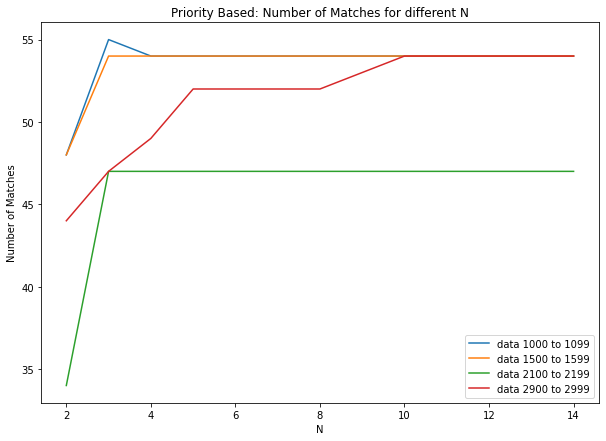

In [11]:
plt.figure(figsize=(10, 7))

plt.title("Priority Based: Number of Matches for different N")
plt.xlabel("N")
plt.ylabel("Number of Matches")

sns.lineplot(y=pb_different_n_1000_1099, x=range(2,15))
sns.lineplot(y=pb_different_n_1500_1599, x=range(2,15))
sns.lineplot(y=pb_different_n_2100_2199, x=range(2,15))
sns.lineplot(y=pb_different_n_2900_2999, x=range(2,15))

plt.legend([
    "data 1000 to 1099",
    "data 1500 to 1599",
    "data 2100 to 2199",
    "data 2900 to 2999"
])